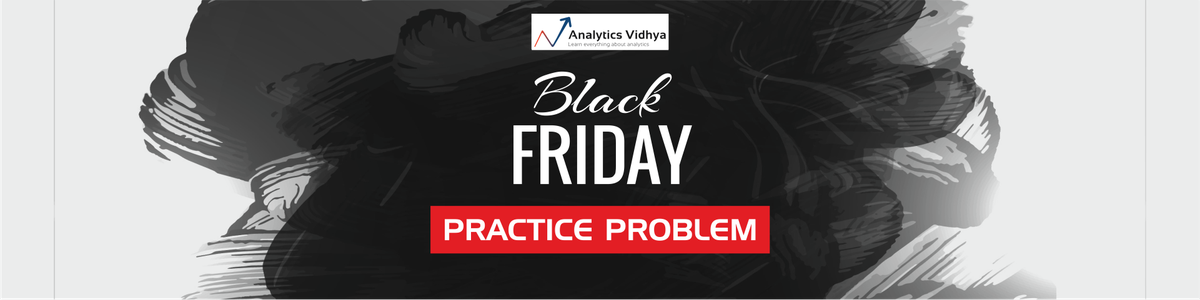

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

please refere [here](https://datahack.analyticsvidhya.com/contest/black-friday/#ProblemStatement)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

from xgboost.sklearn import XGBRegressor

from visualize import plot_counts

import warnings
warnings.filterwarnings("ignore")

import gc

In [2]:
df_train = pd.read_csv('D:/Machine Data/DataHack/Black Firday/train.csv')
df_test = pd.read_csv('D:/Machine Data/DataHack/Black Firday/test.csv')

train_len = len(df_train)
test_len = len(df_test)

In [3]:
df = pd.concat([df_train, df_test], axis=0)

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
del [df_train]
del [df_test]

gc.collect()

43

# EDA

##### Information about the columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


##### Descriptive statistics for the columns

In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


##### Correlation matrix

<AxesSubplot:>

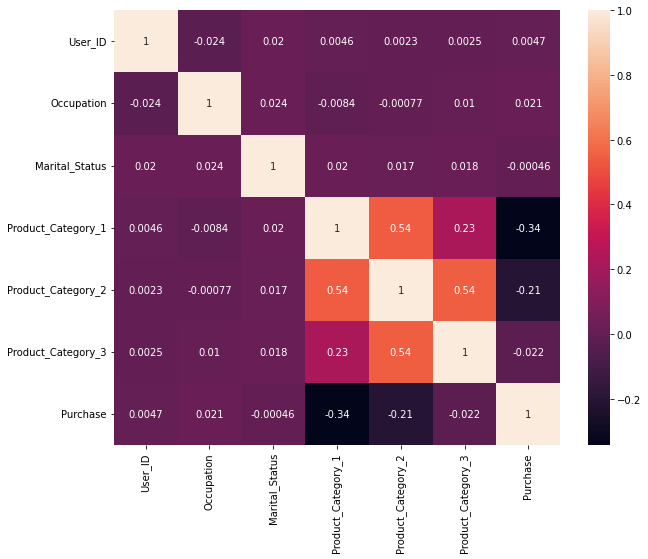

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

##### Checking number of unique categories in each column

In [9]:
df.nunique()

User_ID                        5891
Product_ID                     3677
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

We can conclude that all our columns are categorical with different number of categories and non of them are continious features

##### Checking null values

In [10]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

##### Getting the types of clumns

In [11]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

#####  Filling the nulls with meadian for both columns


In [12]:
# median1 = int(df['Product_Category_2'].median())
df['Product_Category_2'].fillna(0, inplace=True)

In [13]:
# median2 = int(df['Product_Category_3'].median())
df['Product_Category_3'].fillna(0, inplace=True)

In [14]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

##### Checking the counts for each column

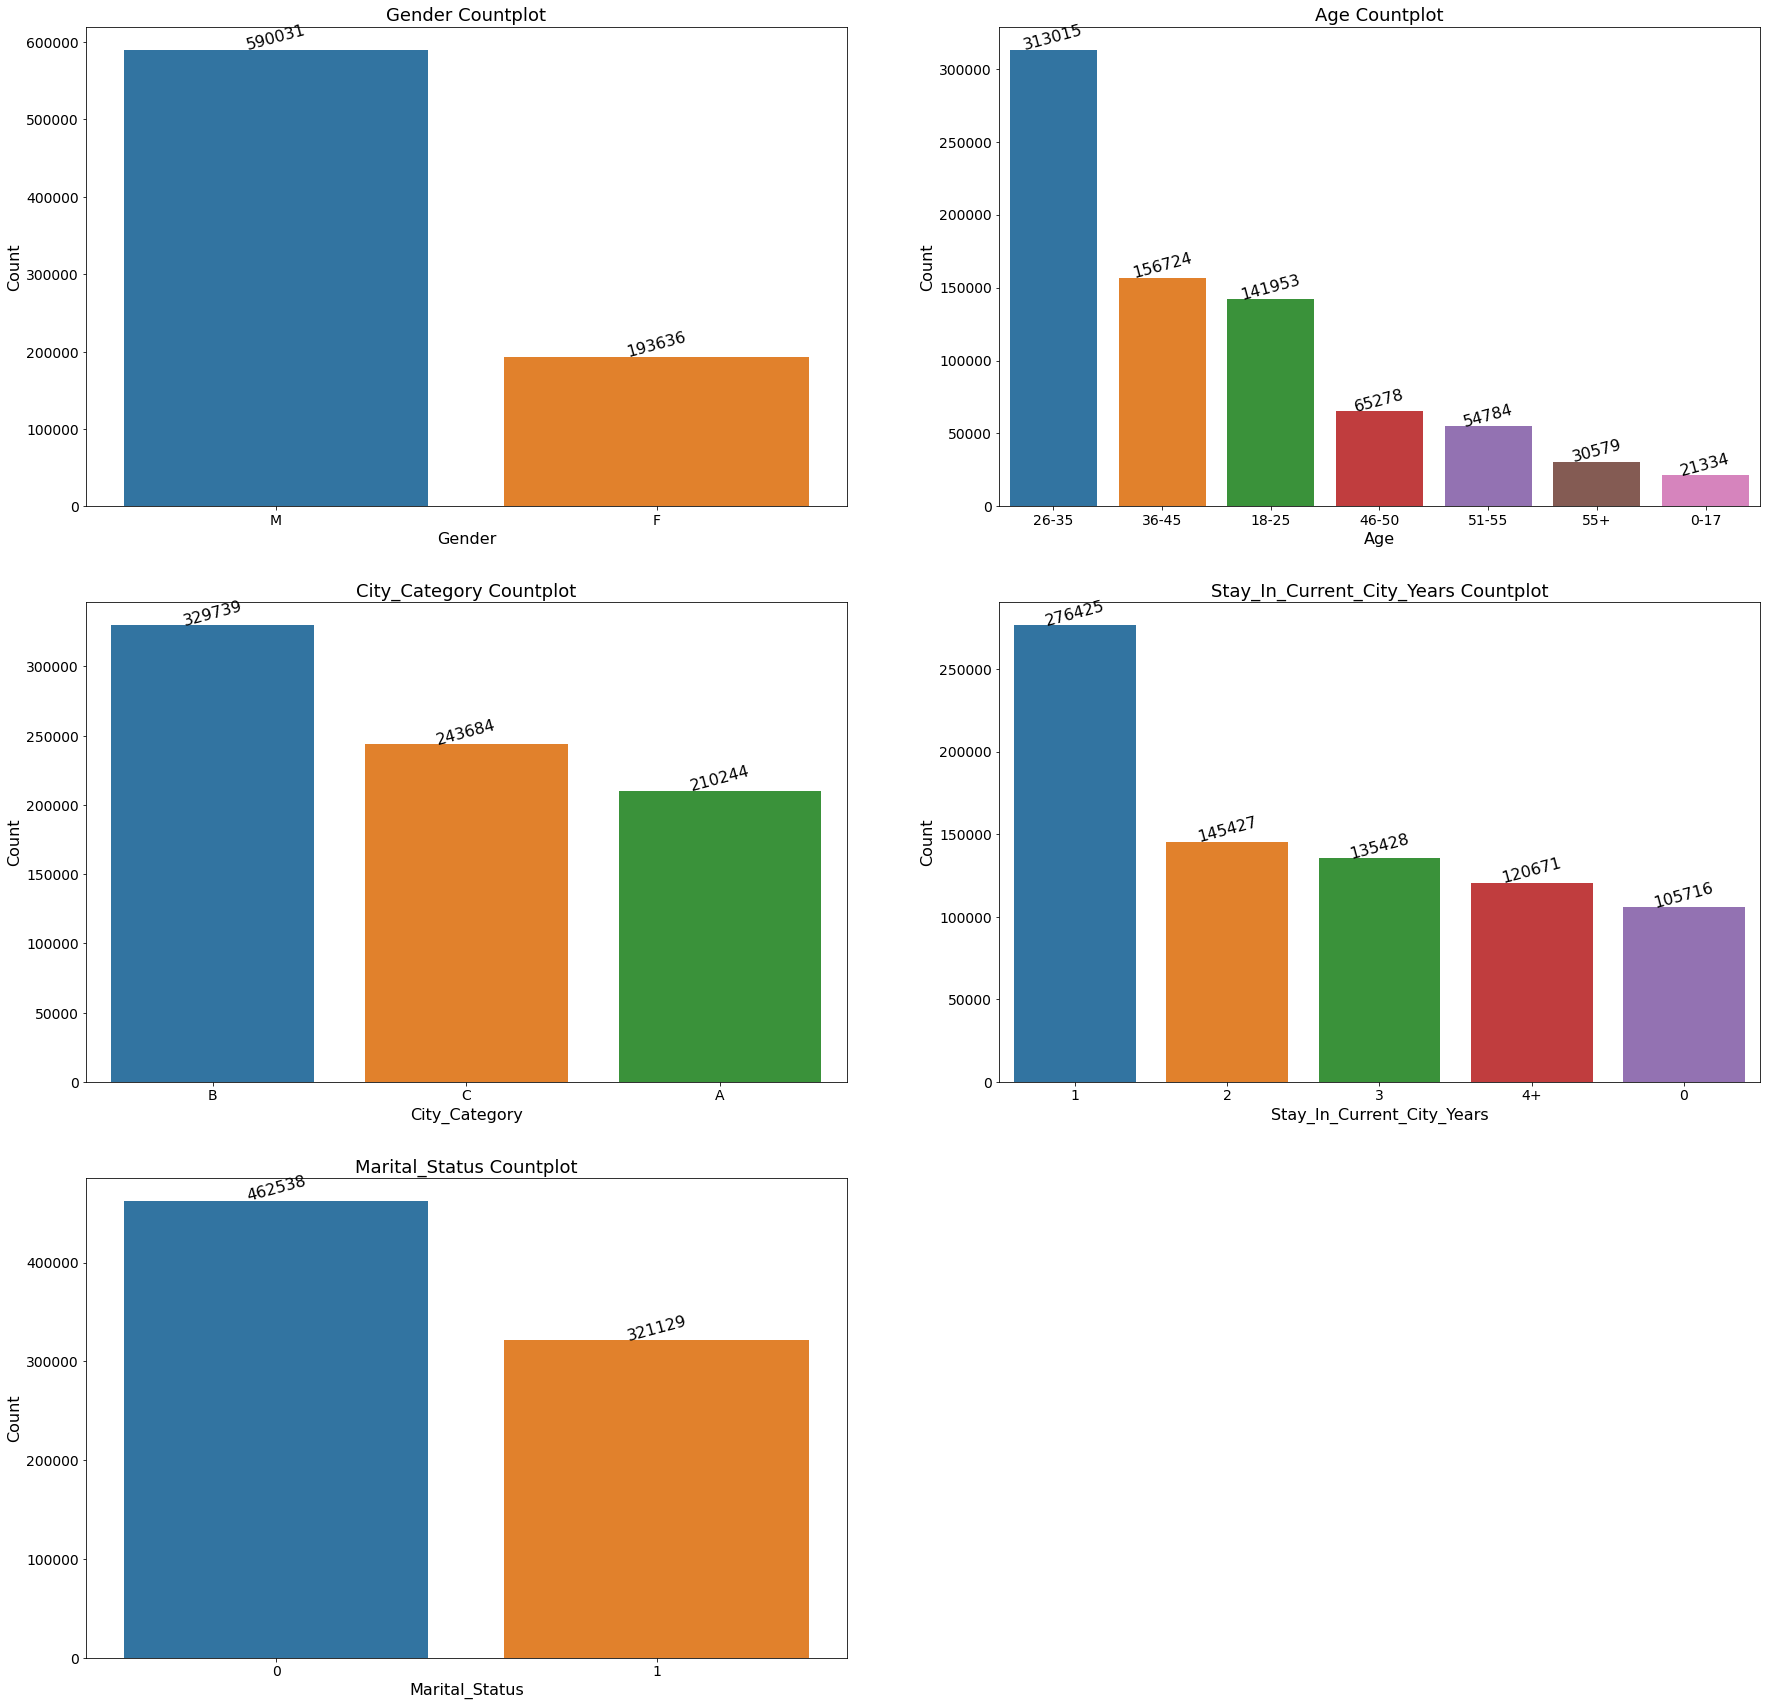

In [15]:
plot_counts((30,30), df, list(df.columns[2:-4][:2]) + list(df.columns[:-4][5:]), 32)

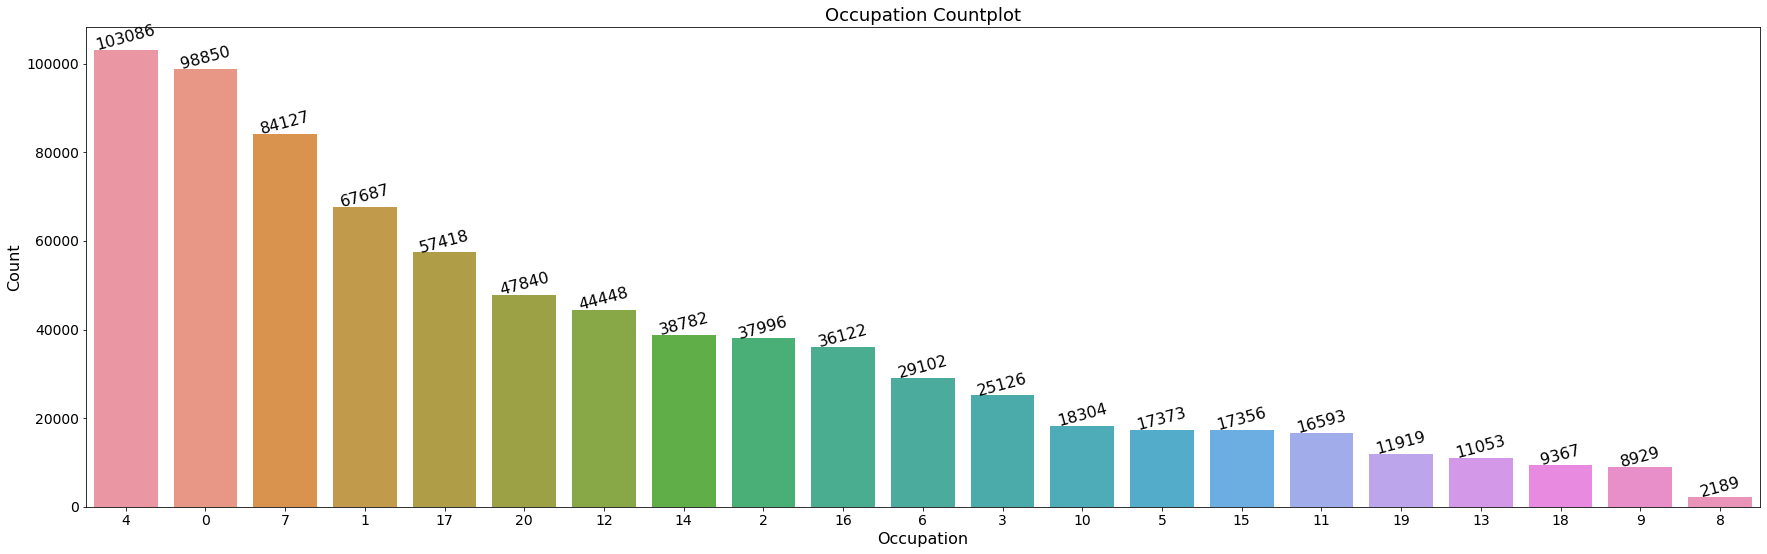

In [16]:
plot_counts((30,30), df, ['Occupation'], 31)

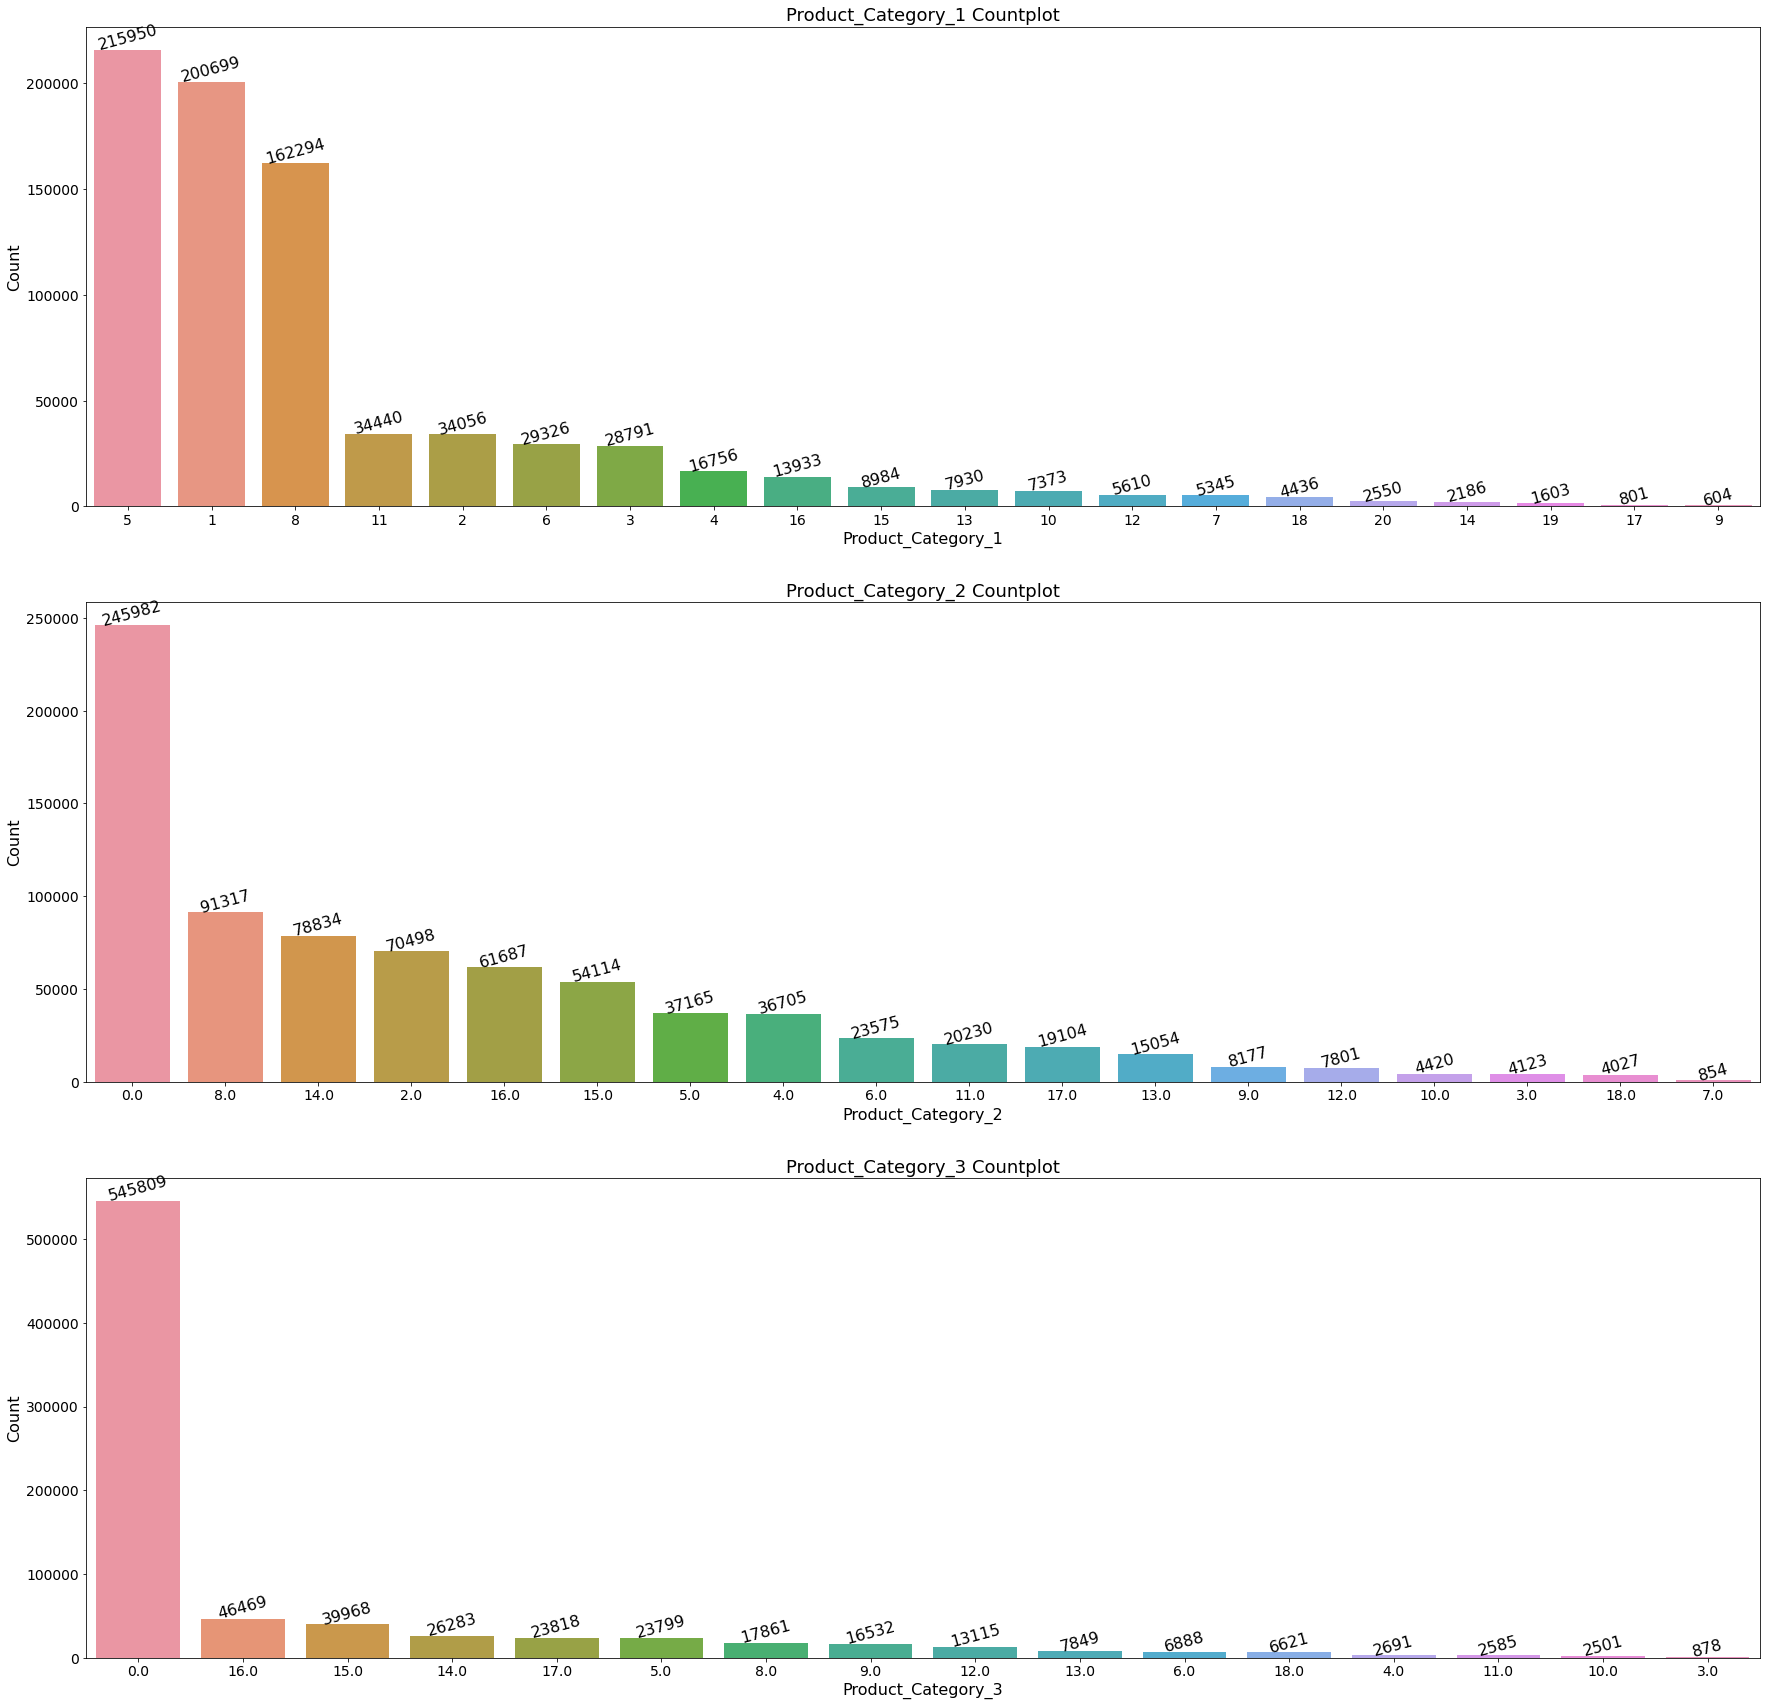

In [17]:
plot_counts((30,30), df, df.columns[-4:-1], 31)

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

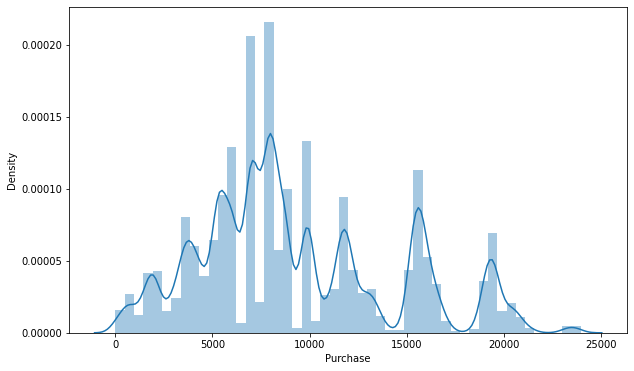

In [18]:
# Plotting the distribution of our target variable
plt.figure(figsize=(10,6))
sns.distplot(df['Purchase'])

# Preprocessing

In [19]:
# Binarizing `Gender` column
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])
le_gender.classes_

array(['F', 'M'], dtype=object)

In [20]:
# Applying Ordinal Encoding for `Age` and `Stay_In_Current_City_Years` columns
oe = OrdinalEncoder()
df[['Age', 'Stay_In_Current_City_Years']] = oe.fit_transform(df[['Age', 'Stay_In_Current_City_Years']])

In [21]:
# Applying nominal Encoding for `City_Category` Column
le_city = LabelEncoder()
df['City_Category'] = le_city.fit_transform(df['City_Category'])
le_city.classes_

array(['A', 'B', 'C'], dtype=object)

In [22]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                          int32
Age                           float64
Occupation                      int64
City_Category                   int32
Stay_In_Current_City_Years    float64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [23]:
# One Hot Encoding the follwing features
to_be_encoded = ['City_Category', 'Age', 'Product_Category_1', 'Product_Category_2', 
                 'Product_Category_3', 'Occupation', 'Stay_In_Current_City_Years']

df = pd.get_dummies(df, columns=to_be_encoded)

In [24]:
df

,User_ID,Product_ID,Gender,Marital_Status,Purchase,City_Category_0,City_Category_1,City_Category_2,Age_0.0,Age_1.0,...,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,Stay_In_Current_City_Years_0.0,Stay_In_Current_City_Years_1.0,Stay_In_Current_City_Years_2.0,Stay_In_Current_City_Years_3.0,Stay_In_Current_City_Years_4.0
0,1000001,P00069042,0,0,8370.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1000001,P00248942,0,0,15200.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1000001,P00087842,0,0,1422.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1000001,P00085442,0,0,1057.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1000002,P00285442,1,0,7969.0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,0,1,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
233595,1006036,P00254642,0,1,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
233596,1006036,P00031842,0,1,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
233597,1006037,P00124742,0,0,NaN,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
correlation = df.iloc[:, 2:].corr()

<AxesSubplot:>

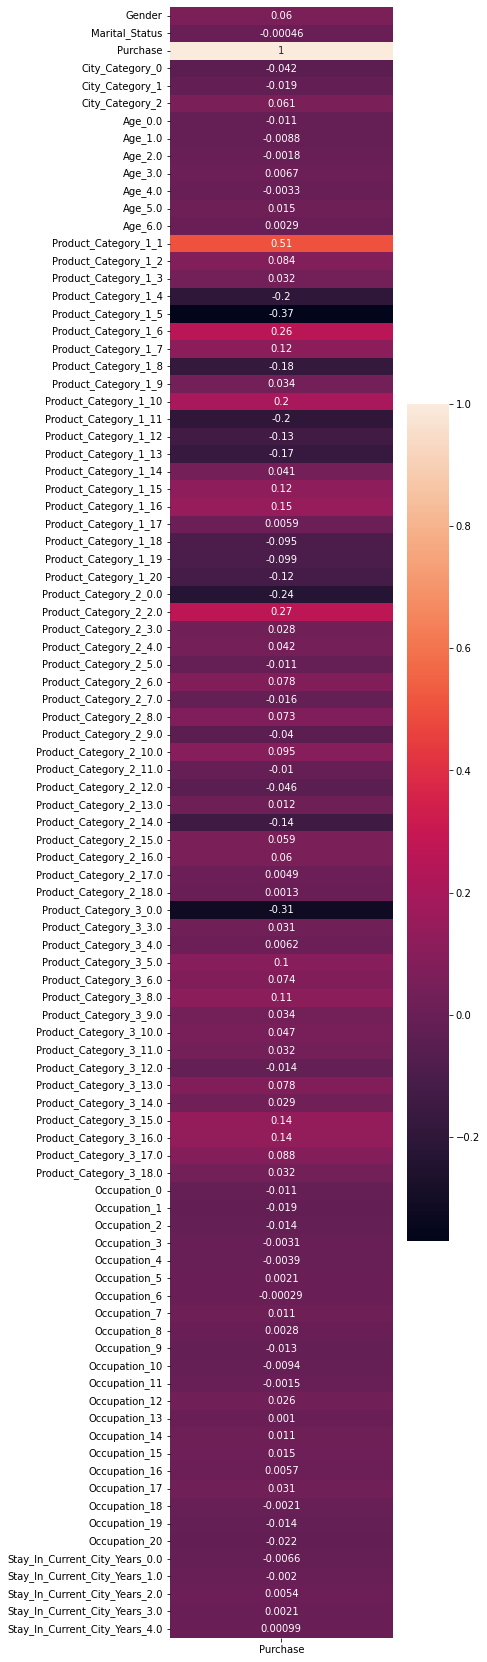

In [26]:
plt.figure(figsize=(5,30))
sns.heatmap(correlation[['Purchase']], annot=True)

##### Here we are going to test our models using the train data only which is from [0:len(train_df)]

In [27]:
X, y = df.drop(columns=['Purchase' ,'User_ID' ,'Product_ID'])[:train_len], df['Purchase'][:train_len]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
X_train.shape

(412551, 92)

In [30]:
# Scaling our data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

##### Just to test our variable importances before building models

In [31]:
selector = SelectKBest(chi2, k=20)
selector.fit(X, y)

SelectKBest(k=20, score_func=<function chi2 at 0x000002372FBAFB80>)

In [32]:
scores = pd.DataFrame([selector.feature_names_in_, selector.scores_]).T
scores.columns=['names', 'scores']
scores

,names,scores
0,Gender,5861.838373
1,Marital_Status,10837.941504
2,City_Category_0,14486.64229
3,City_Category_1,11022.429085
4,City_Category_2,15688.239583
...,...,...
87,Stay_In_Current_City_Years_0.0,15634.570895
88,Stay_In_Current_City_Years_1.0,11645.64469
89,Stay_In_Current_City_Years_2.0,14895.090372
90,Stay_In_Current_City_Years_3.0,15093.113788


<AxesSubplot:xlabel='scores', ylabel='names'>

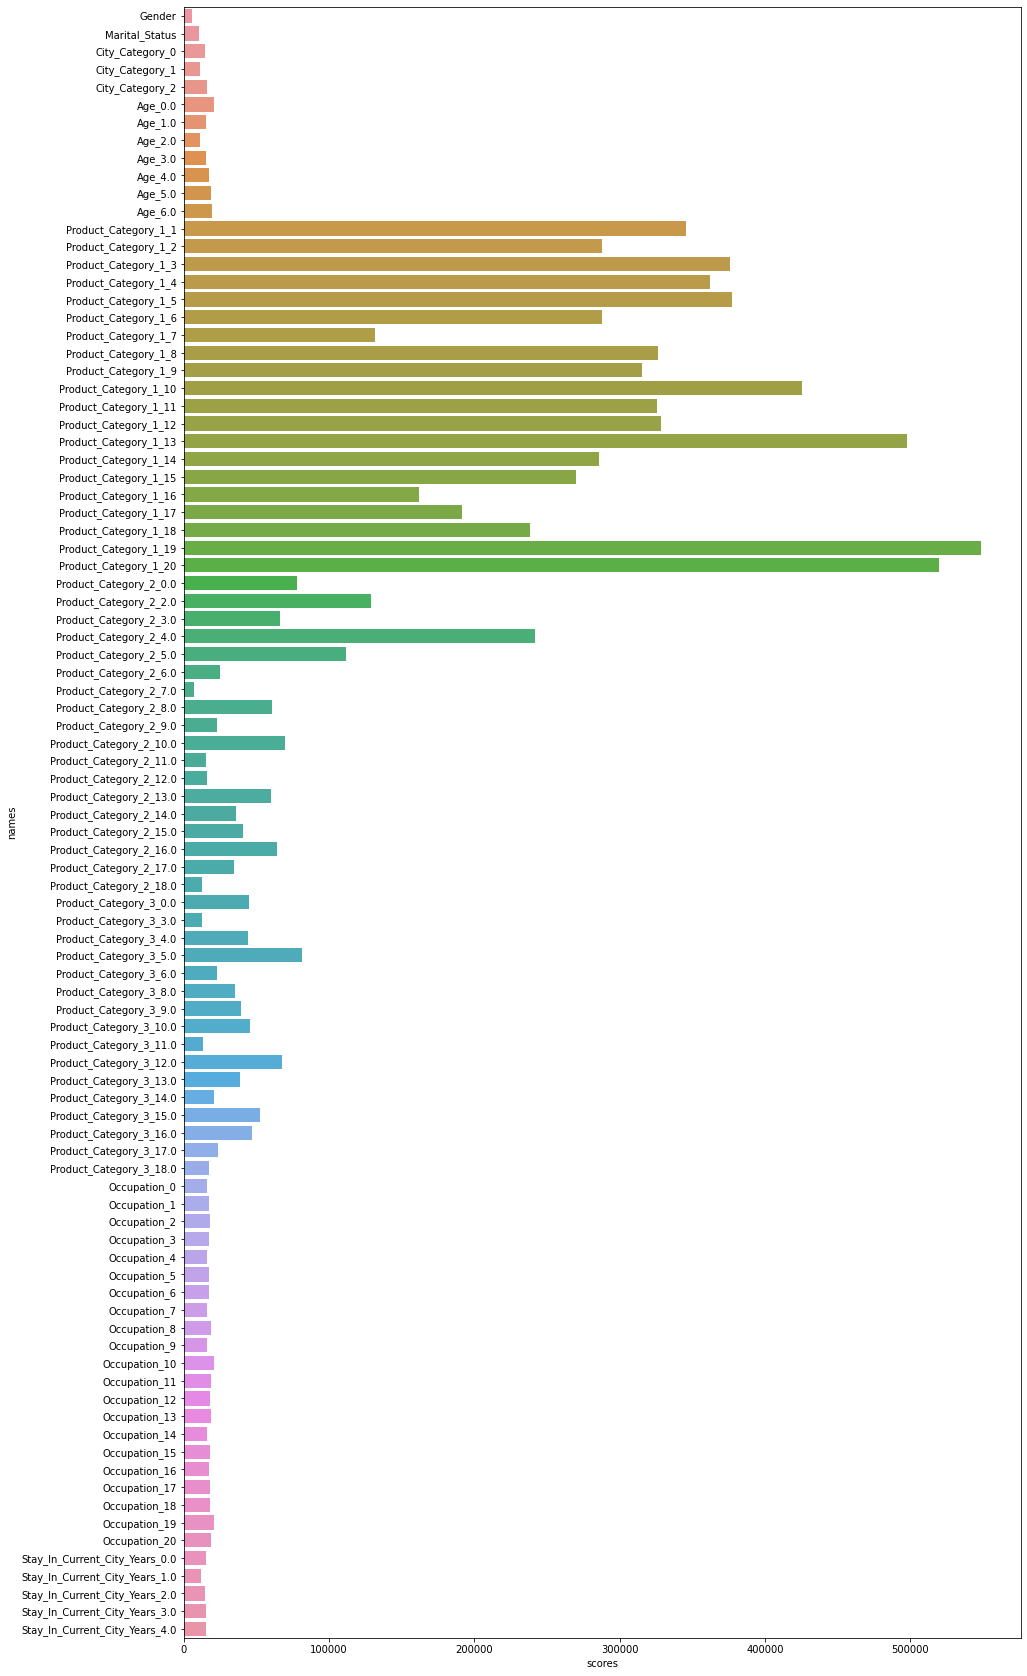

In [33]:
plt.figure(figsize=(15,30))
sns.barplot(x="scores", y="names", data=scores)

# Model Building & Evaluation

In [34]:
def rmse(y, y_hat):
    return np.sqrt(mean_squared_error(y, y_hat))

## Linear Regression

In [35]:
lr = LinearRegression()
lr.fit(X_train_s, y_train)

LinearRegression()

In [36]:
predicted = lr.predict(X_test_s)

In [37]:
rmse(y_test, predicted)

2995.979185207582

In [38]:
r2_score(y_test, predicted)

0.6431632132216228

## Neural Networks

In [39]:
input_shape = (X_train_s.shape[1],)
input_shape

(92,)

In [40]:
model = Sequential()

In [41]:
model.add(Dense(64, activation='relu', input_shape=input_shape))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                5952      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2

In [43]:
model.compile(loss='mse', optimizer=Adam(lr=0.001))

In [44]:
hist = model.fit(X_train_s, y_train, validation_data=(X_test_s, y_test), epochs=7, batch_size=64)

Epoch 1/7
6447/6447 [==============================] - 15s 2ms/step - loss: 9849877.0000 - val_loss: 8768818.0000
Epoch 2/7
6447/6447 [==============================] - 14s 2ms/step - loss: 8681597.0000 - val_loss: 9193150.0000
Epoch 3/7
6447/6447 [==============================] - 14s 2ms/step - loss: 8614862.0000 - val_loss: 8680643.0000
Epoch 4/7
6447/6447 [==============================] - 15s 2ms/step - loss: 8573947.0000 - val_loss: 8720666.0000
Epoch 5/7
6447/6447 [==============================] - 14s 2ms/step - loss: 8530836.0000 - val_loss: 8662729.0000
Epoch 6/7
6447/6447 [==============================] - 14s 2ms/step - loss: 8497733.0000 - val_loss: 8816549.0000
Epoch 7/7
6447/6447 [==============================] - 13s 2ms/step - loss: 8468571.0000 - val_loss: 8604550.0000


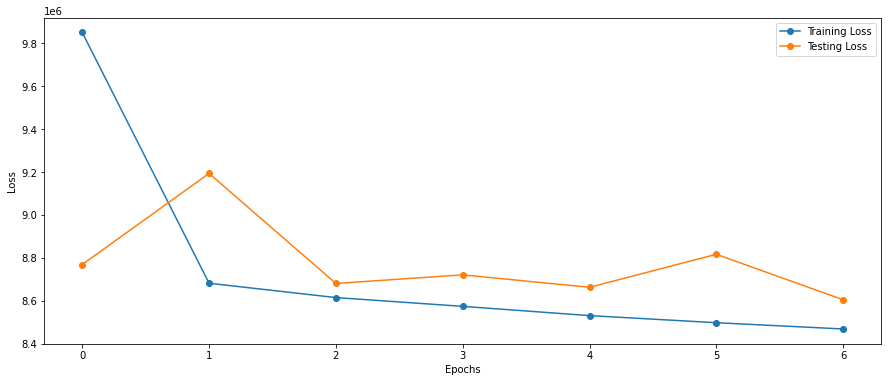

In [45]:
fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(1,1,1)
ax.plot(hist.history['loss'], marker='o',label='Training Loss')
ax.plot(hist.history['val_loss'], marker='o',label='Testing Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()

In [46]:
predicted = model.predict(X_test_s)

4298/4298 [==============================] - 4s 984us/step


In [47]:
rmse(y_test, predicted)

2933.3511795395284

In [48]:
r2_score(y_test, predicted)

0.6579259293005618

## Boosting

In [49]:
booster = XGBRegressor(
        tree_method="hist",
        eval_metric=mean_squared_error,
        learning_rate=1,
        max_depth=8,
        min_child_weight=250,
        max_leaves=0,
        n_jobs=-1
)

In [50]:
booster.fit(X_train_s, y_train, eval_set=[(X_test_s, y_test)])

[0]	validation_0-rmse:3271.35071	validation_0-mean_squared_error:10701735.00000
[1]	validation_0-rmse:3005.92189	validation_0-mean_squared_error:9035567.00000
[2]	validation_0-rmse:2972.04919	validation_0-mean_squared_error:8833077.00000
[3]	validation_0-rmse:2963.44813	validation_0-mean_squared_error:8782025.00000
[4]	validation_0-rmse:2949.84394	validation_0-mean_squared_error:8701579.00000
[5]	validation_0-rmse:2942.90284	validation_0-mean_squared_error:8660677.00000
[6]	validation_0-rmse:2937.63415	validation_0-mean_squared_error:8629695.00000
[7]	validation_0-rmse:2936.06633	validation_0-mean_squared_error:8620485.00000
[8]	validation_0-rmse:2927.70180	validation_0-mean_squared_error:8571438.00000
[9]	validation_0-rmse:2920.19895	validation_0-mean_squared_error:8527562.00000
[10]	validation_0-rmse:2918.49100	validation_0-mean_squared_error:8517591.00000
[11]	validation_0-rmse:2916.46722	validation_0-mean_squared_error:8505780.00000
[12]	validation_0-rmse:2909.85877	validation_0-me

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=<function mean_squared_error at 0x000002372FCBA8B0>,
             gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=1, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=8, max_leaves=0,
             min_child_weight=250, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [51]:
predicted = booster.predict(X_test_s)

In [52]:
rmse(y_test, predicted)

2874.2285905209037

In [53]:
r2_score(y_test, predicted)

0.6715761811464345

<AxesSubplot:title={'center':'Residuals of Booster Model'}, xlabel='Purchase', ylabel='Density'>

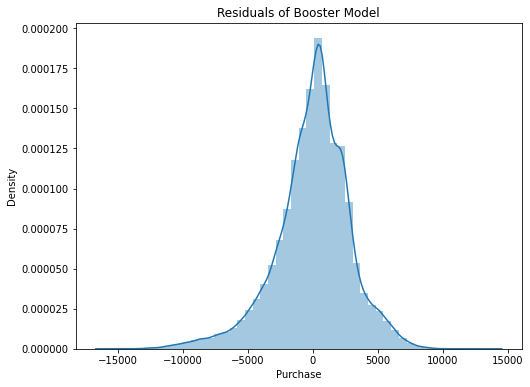

In [54]:
plt.figure(figsize=(8,6))
plt.title("Residuals of Booster Model")
sns.distplot(y_test - predicted)

# Inferencing

##### SInce our booster model is the superior of all other models, then we will use it to predict the data of our model

In [55]:
scaler = StandardScaler()

In [56]:
scaler.fit_transform(df.drop(columns=['User_ID', 'Product_ID', 'Purchase'])[:train_len])

array([[-1.74651251, -0.83301799,  1.65036982, ...,  2.09795191,
        -0.45773082, -0.42669959],
       [-1.74651251, -0.83301799,  1.65036982, ...,  2.09795191,
        -0.45773082, -0.42669959],
       [-1.74651251, -0.83301799,  1.65036982, ...,  2.09795191,
        -0.45773082, -0.42669959],
       ...,
       [-1.74651251,  1.20045427, -0.6059248 , ..., -0.47665535,
        -0.45773082,  2.34356916],
       [-1.74651251, -0.83301799, -0.6059248 , ...,  2.09795191,
        -0.45773082, -0.42669959],
       [-1.74651251,  1.20045427, -0.6059248 , ..., -0.47665535,
        -0.45773082,  2.34356916]])

In [57]:
booster.fit(
    scaler.fit_transform(df.drop(columns=['User_ID', 'Product_ID', 'Purchase'])[:train_len]),
    df['Purchase'][:train_len]
)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=<function mean_squared_error at 0x000002372FCBA8B0>,
             gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=1, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=8, max_leaves=0,
             min_child_weight=250, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [58]:
predicted = booster.predict(scaler.transform(df.drop(columns=['User_ID', 'Product_ID', 'Purchase'])[-test_len:]))

In [59]:
result = pd.DataFrame(predicted, columns=['Purchase'])
result[['User_ID', 'Product_ID']] = df[['User_ID', 'Product_ID']][-test_len:]

In [60]:
result.to_csv('D:/Machine Data/DataHack/Black Firday/to_submit4.csv')